# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

N = 200

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

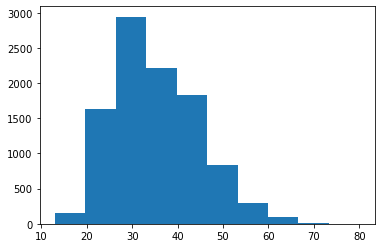

In [4]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[33.63805543 29.8039379  36.96692117 40.03089766 18.1661744  43.97208358
 38.16929893 25.1590883  41.51388753 20.796049   31.66966214 21.73241606
 51.59600761 27.67723726 46.48877605 49.38839344 37.14149469 38.04436641
 45.99514466 23.6414123  38.54615102 49.70858058 27.31329535 23.59537
 30.99750814 15.220046   30.51362546 28.95855271 40.7573791  32.17318205
 28.29864343 49.81336684 43.38541208 49.86638268 38.52711343 42.66856058
 44.06551887 22.61075843 35.77542401 25.19406814 28.4616395  36.75216363
 42.63832139 24.9415717  34.88047114 29.73134996 43.16411166 39.57171995
 25.81428297 40.46745817 57.27577071 34.44828719 29.75470759 26.56809646
 31.52124803 51.9175442  41.23929959 41.84654724 18.91905611 33.5204504
 30.94264656 35.6343657  24.16323454 37.19255894 41.49717097 39.93138934
 38.15635843 36.12897347 32.33821379 35.7990084  47.4797134  43.03864813
 47.19334387 44.44374999 34.37369221 35.0957981  35.69543952 27.44432414
 36.7313373  38.29365733 37.75172421 53.93075848 42.184

(array([ 2.,  1., 10., 25., 34., 45., 38., 25., 15.,  5.]),
 array([ 4.55631148,  9.97120579, 15.38610011, 20.80099442, 26.21588873,
        31.63078304, 37.04567736, 42.46057167, 47.87546598, 53.29036029,
        58.7052546 ]),
 <BarContainer object of 10 artists>)

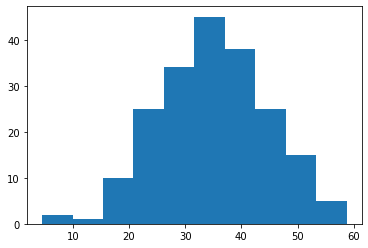

In [5]:
rng = np.random.default_rng()
vals = rng.normal(loc = ages.mean(), scale = ages.std(), size = N)
print(vals)
plt.hist(vals, bins=10)

This appears to be a relatively close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [6]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [7]:
noOxPotential = df.Age.count() 
noOxPotential

10010

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above. We can use this probability with the binomial distribution to generate our synthetic data on oxygen use.

In [8]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.02127872127872128

Calculate use of oxygen synthetic data

In [9]:
oxUse = []
for a in vals:
    #if a >= 18 and a <= 55:
    #    oxUse.append(synNoOx)
    #else:
    #    oxUse.append(1)
    synNoOx = rng.binomial(1, noOxProbability)
    oxUse.append(synNoOx)
print(oxUse)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Next we calculate the probabilities of climbing in each season.

In [10]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9692307692307692,
 0.0008991008991008991,
 0.028371628371628373,
 0.0014985014985014985]

Generate a set of seasons chosen by each climber in the synthetic dataset. We can use the choices method from the random package, with the probabilities above as the weights, to determine a synthetic dataset reflective of the general choices of climbers. It will be heavily dominated by spring but should a couple of attempts in the autumn. Summer and winter are unlikely to feature unless the size of the dataset, N, is quite large.

In [11]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr'

Calculate the probabilities of surviving for summitting in each season with and without oxygen. Again we will use these probabilities with the binomial distribution as we are considering a binary choice, either surviving or not.

In [12]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.06
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.13
The historical probability of death after summitting when climbing with oxygen in Aut is 0.02
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.07


Compile list with climber number, ages, season and oxygen use.

In [13]:
synEverestData = []

def everestFunction():
    for i in range(0, N):
        data = []
        if oxUse[i] == 0 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y')].Season.count())

        if oxUse[i] == 1:
            oxUse2 = 'No'
        else:
            oxUse2 = 'Yes'

        if death == 0:
            death2 = 'Survived'
        else:
            death2 = 'Died'


        data = [i, round(vals[i],0), oxUse2, seasList[i], death2]
        synEverestData.append(data)
        synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])
        
    return synEverestDataDf
        

everestFunction()



,Climber,Age,Oxygen,Season,Survived
0,0,34.0,Yes,Spr,Died
1,1,30.0,Yes,Spr,Died
2,2,37.0,Yes,Spr,Survived
3,3,40.0,Yes,Spr,Survived
4,4,18.0,Yes,Spr,Survived
...,...,...,...,...,...
195,195,34.0,Yes,Spr,Survived
196,196,32.0,Yes,Spr,Survived
197,197,40.0,Yes,Spr,Survived
198,198,31.0,Yes,Spr,Survived


In [14]:
synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])

synEverestDataDf.head()

,Climber,Age,Oxygen,Season,Survived
0,0,34.0,Yes,Spr,Died
1,1,30.0,Yes,Spr,Died
2,2,37.0,Yes,Spr,Survived
3,3,40.0,Yes,Spr,Survived
4,4,18.0,Yes,Spr,Survived


The number of deaths in this synthetic dataset can be measured against the historicial death rate.

In [15]:
numberOfDeaths = synEverestDataDf[synEverestDataDf['Survived'] == 'Died'].Survived.count()
numberOfDeaths

19

The historical death rate is calculated by:

In [16]:
historicalDeathRate = round(df[(df['Dth'] == 'Y')].Dth.count() / df.Dth.count(),3)
print(historicalDeathRate)

0.008


Our dataset death rate is calculated by:

In [17]:
predictDeathRate = round(synEverestDataDf[(synEverestDataDf['Survived'] == 'Died')].Survived.count() / synEverestDataDf.Survived.count(),3)
print(predictDeathRate)

0.095
